# Downloading datas and checkpoints

In [ ]:
!for file in "12kSN6doGy5csr0NQAaY_kmqA9Xu2Uisq" "1oY1Ey8ttwh7eufx2EWf0jQj1LhXIbgBu"; do wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='${file} -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="${file} -O ${file}.zip && rm -rf /tmp/cookies.txt; done


# Cloning and unzipping

In [2]:
!git clone https://github.com/oodmedicalcvpr2021/ood_medical_images.git && \
mkdir -p ood_medical_images/checkpoints/devries/ && \
unzip -qq "12kSN6doGy5csr0NQAaY_kmqA9Xu2Uisq.zip" -d ood_medical_images/checkpoints/devries && \
unzip -qq "1oY1Ey8ttwh7eufx2EWf0jQj1LhXIbgBu.zip" -d ood_medical_images/data


Cloning into 'ood_medical_images'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 59 (delta 21), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (59/59), done.


# Testing

In [6]:
!cd ood_medical_images/ && python test.py --ckpt checkpoints/devries/ood_retina_model_0.03275.pth \
--idd_name retina --ood_name mimic-crx skeletal-age mura drimdb \
--network resnet50

Let's use 1 GPUs!
Accuracy 0.4396
OOD Metrics {'fpr_at_95_tpr': 0.0, 'detection_error': 0.0, 'auroc': 1.0, 'aupr_in': 1.0, 'aupr_out': 0.979, 'num_95_tpr': 4, 'OOD Name': 'mimic-crx'}
{'fpr_at_95_tpr': 0.01, 'detection_error': 0.015, 'auroc': 0.997, 'aupr_in': 0.985, 'aupr_out': 0.999, 'num_95_tpr': 76, 'OOD Name': 'skeletal-age'}
{'fpr_at_95_tpr': 0.0, 'detection_error': 0.0, 'auroc': 0.999, 'aupr_in': 1.0, 'aupr_out': 0.955, 'num_95_tpr': 4, 'OOD Name': 'mura'}
{'fpr_at_95_tpr': 0.121, 'detection_error': 0.11, 'auroc': 0.951, 'aupr_in': 0.985, 'aupr_out': 0.915, 'num_95_tpr': 16, 'OOD Name': 'drimdb'}
Dumping outputs in checkpoints/devries
retina max conf 0.96 min conf 0.63
mimic-crx max conf 0.64 min conf 0.62
skeletal-age max conf 0.7 min conf 0.6
mura max conf 0.64 min conf 0.61
drimdb max conf 0.85 min conf 0.61


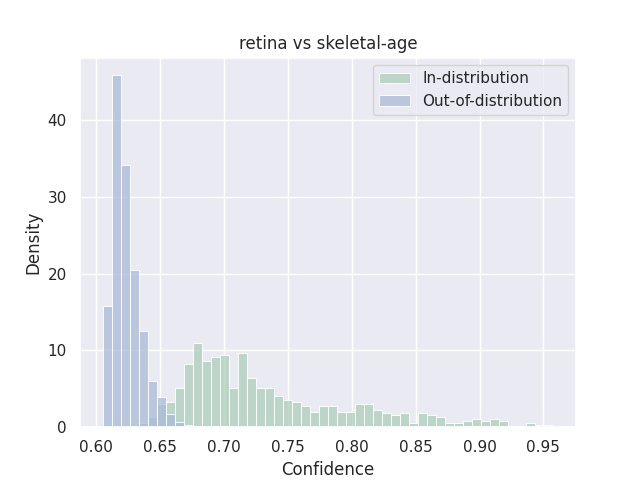

In [7]:
from PIL import Image
from io import BytesIO
from IPython.display import display
import numpy as np
x = Image.open("ood_medical_images/checkpoints/devries/skeletal-agehistogram.jpg")
display(x)

# 32x32 experiments


In [ ]:
!for file in "1d4ATBsyh36hZgyUw23mTws4kuI7rVOiX" ; do wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='${file} -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="${file} -O ${file}.zip && rm -rf /tmp/cookies.txt; done


In [16]:
!unzip -qq "1d4ATBsyh36hZgyUw23mTws4kuI7rVOiX.zip" -d ood_medical_images/data/

In [18]:
!cd ood_medical_images/ && python train32.py --experiment_name=32x32 \
--idd_name retina --ood_name mimic-crx skeletal-age mura \
--batch_size 64 --network WideResNet \
--early_stop_metric fpr_at_95_tpr --eval_start 10 --num_epochs 20 --lr 0.001

Files already downloaded and verified
Files already downloaded and verified
Using downloaded and verified file: SVHN/test_32x32.mat
Let's use 1 GPUs!
Network WideResNet 
Total number of parameters : 36.47663M
[Epoch 10][Step 80/80] task_loss: 12.37346, Lr: 1.00e-03, ES: 0, 0.00 m remaining          {'fpr_at_95_tpr': 0.0, 'detection_error': 0.0, 'auroc': 1.0, 'aupr_in': 1.0, 'aupr_out': 1.0, 'num_95_tpr': 6, 'OOD Name': 'mimic-crx'}
{'fpr_at_95_tpr': 0.0, 'detection_error': 0.0, 'auroc': 1.0, 'aupr_in': 1.0, 'aupr_out': 1.0, 'num_95_tpr': 6, 'OOD Name': 'skeletal-age'}
{'fpr_at_95_tpr': 0.0, 'detection_error': 0.0, 'auroc': 1.0, 'aupr_in': 1.0, 'aupr_out': 1.0, 'num_95_tpr': 6, 'OOD Name': 'mura'}
Early stop metric fpr_at_95_tpr beaten. Now 0.0
[Epoch 11][Step 80/80] task_loss: 30.44489, Lr: 1.00e-03, ES: 0, 0.00 m remaining          {'fpr_at_95_tpr': 0.0, 'detection_error': 0.0, 'auroc': 1.0, 'aupr_in': 1.0, 'aupr_out': 1.0, 'num_95_tpr': 9, 'OOD Name': 'mimic-crx'}
{'fpr_at_95_tpr': 0

In [19]:
!cd ood_medical_images/ && python test32.py --ckpt checkpoints/32x32/model_0.0.pth \
--idd_name retina --ood_name mimic-crx skeletal-age mura drimdb \
--network WideResNet

Using downloaded and verified file: SVHN/test_32x32.mat
Files already downloaded and verified
Let's use 1 GPUs!
Accuracy None
OOD Metrics {'fpr_at_95_tpr': 0.0, 'detection_error': 0.0, 'auroc': 1.0, 'aupr_in': 1.0, 'aupr_out': 1.0, 'num_95_tpr': 4, 'OOD Name': 'mimic-crx'}
{'fpr_at_95_tpr': 0.0, 'detection_error': 0.0, 'auroc': 1.0, 'aupr_in': 1.0, 'aupr_out': 1.0, 'num_95_tpr': 8, 'OOD Name': 'skeletal-age'}
{'fpr_at_95_tpr': 0.0, 'detection_error': 0.0, 'auroc': 1.0, 'aupr_in': 1.0, 'aupr_out': 1.0, 'num_95_tpr': 4, 'OOD Name': 'mura'}
Dumping outputs in checkpoints/32x32
retina max conf 1.0 min conf 1.0
mimic-crx max conf 0.0 min conf 0.0
skeletal-age max conf 0.99 min conf 0.0
mura max conf 0.0 min conf 0.0
drimdb max conf 0.14 min conf 0.0
SVHN max conf 1.0 min conf 0.0
cifar100 max conf 0.99 min conf 0.0


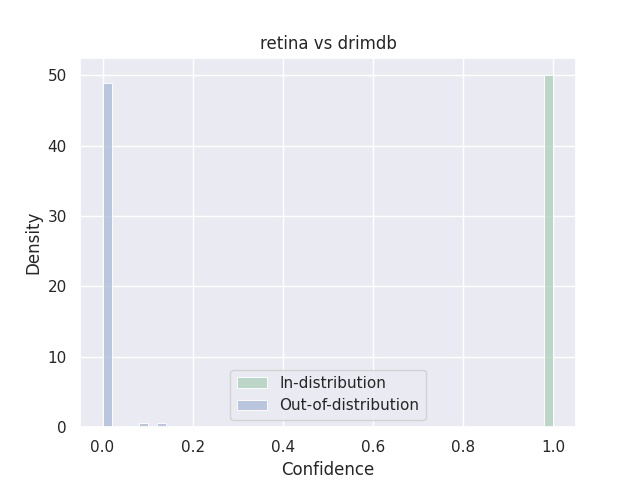

In [21]:
from PIL import Image
from io import BytesIO
from IPython.display import display
import numpy as np
x = Image.open("ood_medical_images/checkpoints/32x32/drimdbhistogram.jpg")
display(x)